In [1]:
!pip install tensorflow-gpu==2.3.1

     |████████████████████████████████| 320.4MB 48kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [4]:
# Loading data from google drive

# Mounting drive
passanger_data = pd.read_csv('/content/drive/My Drive/Datasets/AirPassengers.csv')

In [5]:
passanger_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
passanger_data.columns

Index(['Month', '#Passengers'], dtype='object')

In [11]:
passanger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [13]:
# We have only 44 columns
passanger_data.count()

Month          144
#Passengers    144
dtype: int64

In [21]:
# Dropping month column
data = passanger_data['#Passengers']

In [22]:
data.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [23]:
# We are converting dataframe data to numpy

airline_passanger_data = np.array(data)
airline_passanger_data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [25]:
airline_passanger_data.shape

(144,)

In [26]:
# Also reshaping data
airline_passanger_data = airline_passanger_data.reshape(-1,1)

In [27]:
# What after reshaping data
# It is converted to vector
airline_passanger_data.shape

(144, 1)

In [28]:
airline_passanger_data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

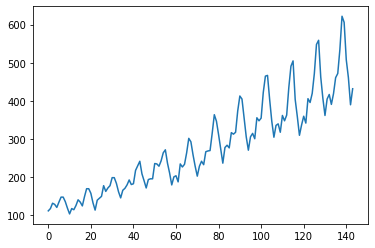

In [29]:
# Plotting datasets
plt.plot(airline_passanger_data)

In [30]:
# Scaling all the passanger count from 0 to 1 using minmax scaler
scaler =  MinMaxScaler()
airline_passanger_data_scaled = scaler.fit_transform(airline_passanger_data)
airline_passanger_data_scaled

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [33]:
# Verification shows that passanger data are scaled
airline_passanger_data_scaled.max(),airline_passanger_data_scaled.min()

(1.0, 0.0)

In [92]:
# How to train and test our mode

# 1. We consider first 100 month data as the training data
# 2. and Last 44 month(100-144) data as the testing data

train_size = 100
test_size = 44

# Take 0 to 100 rows and all columns from airline_passanger_data
train_data_accumulator = airline_passanger_data_scaled[0:train_size, :]
# Taking data above 100 and consider all columns
test_data_accumulator = airline_passanger_data_scaled[train_size:, :]

In [93]:
train_data_accumulator.shape,test_data_accumulator.shape

((100, 1), (44, 1))

In [94]:
len(train_data_accumulator)

100

In [97]:
train_data_accumulator[0:1,:]

array([[0.01544402]])

In [63]:
train_data_accumulator[98:100][:]

array([[0.48648649],
       [0.47104247]])

### **Building training and testing datasets**

In [116]:
def get_data(dataset):
  x = []
  y = []
  for i in range(0, len(dataset)-1):
    # We consider first passanger data(number of passanger in a month) as input(either for training or testing)
    x.append(dataset[i,0])
    # passanger data(number of passanger in second month) next to first(input) is considered as  
    # data for prediction
    y.append(dataset[i+1,0])

  return np.array(x),np.array(y)


In [213]:
# Getting x_train and y_train
x_train,y_train = get_data(train_data_accumulator)

In [119]:
x_train.shape

(99,)

In [120]:
y_train.shape

(99,)

In [129]:
x_train[:10]

array([0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
       0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753])

In [130]:
y_train[:10]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ])

In [212]:
# Getting x_test and y_test
x_test,y_test = get_data(test_data_accumulator)

In [132]:
x_test.shape

(43,)

In [133]:
y_test.shape

(43,)

In [134]:
x_test

array([0.48455598, 0.61389961, 0.6969112 , 0.7007722 , 0.57915058,
       0.46911197, 0.38803089, 0.44787645, 0.45559846, 0.41312741,
       0.4980695 , 0.47104247, 0.5       , 0.63899614, 0.74710425,
       0.77413127, 0.57915058, 0.49227799, 0.3976834 , 0.44980695,
       0.49420849, 0.45945946, 0.58301158, 0.56370656, 0.61003861,
       0.71042471, 0.85714286, 0.87837838, 0.69305019, 0.58494208,
       0.4980695 , 0.58108108, 0.6042471 , 0.55405405, 0.60810811,
       0.68918919, 0.71042471, 0.83204633, 1.        , 0.96911197,
       0.77992278, 0.68918919, 0.55212355])

In [135]:
y_test

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197,
       0.38803089, 0.44787645, 0.45559846, 0.41312741, 0.4980695 ,
       0.47104247, 0.5       , 0.63899614, 0.74710425, 0.77413127,
       0.57915058, 0.49227799, 0.3976834 , 0.44980695, 0.49420849,
       0.45945946, 0.58301158, 0.56370656, 0.61003861, 0.71042471,
       0.85714286, 0.87837838, 0.69305019, 0.58494208, 0.4980695 ,
       0.58108108, 0.6042471 , 0.55405405, 0.60810811, 0.68918919,
       0.71042471, 0.83204633, 1.        , 0.96911197, 0.77992278,
       0.68918919, 0.55212355, 0.63320463])

In [214]:
# Reshaping our data to 3d image to feed to neural network
x_train = x_train.reshape(x_train.shape[0],1,1)
x_test = x_test.reshape(x_test.shape[0],1,1)

### **Building Model**

In [138]:
model = Sequential()
model.add(LSTM(4,input_shape=(1,1)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [141]:
history = model.fit(x_train,y_train,epochs =500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.0101
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.0101
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.0101
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.0101
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.0101
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.0101
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.0101
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.0101
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.0101
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.0101
Epoch 11/500
4/4 [===========

In [165]:
y_predict = model.predict(x_test)

In [166]:
# Run only once

# reversing back to original label
y_predict = scaler.inverse_transform(y_predict)
# For y_test reshaping it before reversing it
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [167]:
y_predict

array([[350.8035 ],
       [408.58292],
       [442.17035],
       [443.66376],
       [393.69003],
       [343.5026 ],
       [304.0448 ],
       [333.3422 ],
       [337.0526 ],
       [316.4392 ],
       [357.12723],
       [344.41937],
       [358.02563],
       [419.0354 ],
       [461.11002],
       [470.88812],
       [393.69003],
       [354.4246 ],
       [308.8286 ],
       [334.2714 ],
       [355.32678],
       [338.90118],
       [395.36856],
       [386.91714],
       [406.95215],
       [447.3704 ],
       [499.15054],
       [505.96887],
       [440.671  ],
       [396.20563],
       [357.12723],
       [394.53003],
       [404.49466],
       [382.63702],
       [406.1345 ],
       [439.1653 ],
       [447.3704 ],
       [490.88065],
       [542.06476],
       [533.35077],
       [472.9458 ],
       [439.1653 ],
       [381.7767 ]], dtype=float32)

In [168]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.]])

In [169]:
y_predict.shape

(43, 1)

In [170]:
y_test.shape

(43, 1)

In [179]:
def plot_learning_curve(y_predict,y_test):
  # plot baseline and predictions
  plt.figure(figsize = (14,8))
  plt.plot(y_test,label='Real number of ailine Passangers')
  plt.plot(y_predict,label='Predicted number of Passangers')
  plt.ylabel('#passangers')
  plt.legend()
  plt.show()

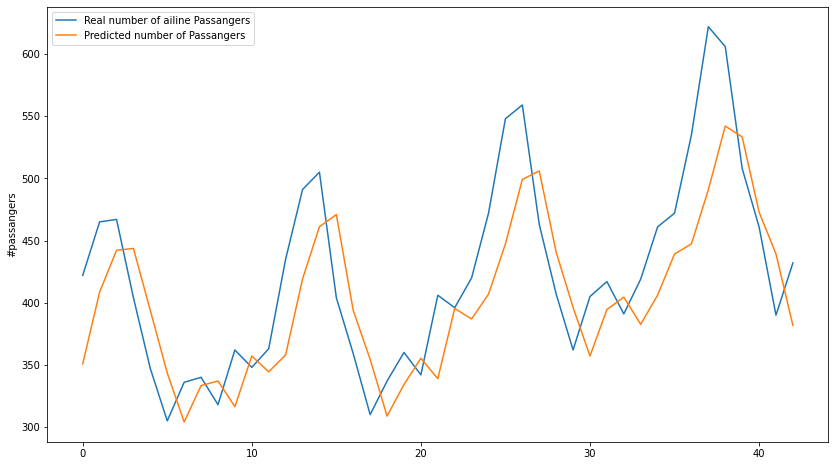

In [180]:
# Plotting learning curve
# y_predict and y_test must be normally scaled
plot_learning_curve(y_predict,y_test)

Test Model 1

In [209]:
model1 = Sequential()
model1.add(LSTM(4,input_shape=(1,1)))
model1.add(Dense(1))

model1.compile(optimizer='adam',loss='mean_squared_error')

In [210]:
history1 = model1.fit(x_train,y_train,epochs =500)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0848
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0682
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0654
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0603
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0579
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0555
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

In [215]:
y_predict1 = model1.predict(x_test)

In [216]:
# Run only once

# reversing back to original label
y_predict1 = scaler.inverse_transform(y_predict1)
# For y_test reshaping it before reversing it
y_test1 = y_test.reshape(-1,1)
y_test1 = scaler.inverse_transform(y_test1)

In [217]:
y_predict1[:5]

array([[357.18488],
       [423.56186],
       [464.29077],
       [466.14313],
       [406.0365 ]], dtype=float32)

In [218]:
y_test1[:5]

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.]])

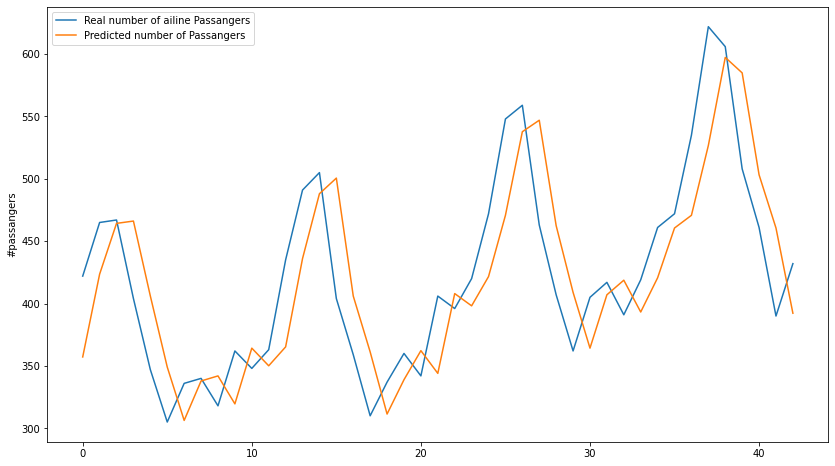

In [219]:
plot_learning_curve(y_predict1,y_test1)